**Визуализация данных об оттоке клиентов некоторого банка**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
%matplotlib inline

In [7]:
churn_data = pd.read_csv('Data\churn.csv') # импортируем данные

**Content**
- RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
- CustomerId — идентификатор клиента
- Surname — фамилия клиента
- CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
- Geography — страна клиента (банк международный)
- Gender — пол клиента
- Age — возраст клиента
- Tenure — сколько лет клиент пользуется услугами банка
- Balance — баланс на счетах клиента в банке
- NumOfProducts — количество услуг банка, которые приобрёл клиент
- HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
- IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
- EstimatedSalary — предполагаемая заработная плата клиента
- Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

**9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.**

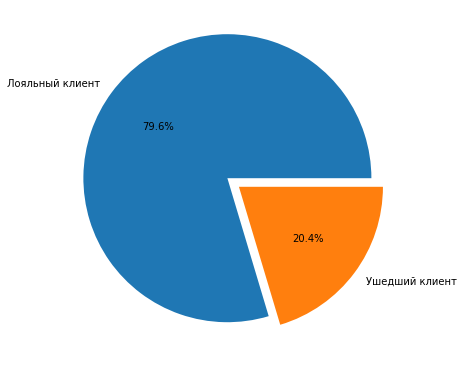

In [8]:
used_data = churn_data['Exited'].value_counts()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    used_data,
    labels= ('Лояльный клиент', 'Ушедший клиент'),
    autopct='%.1f%%',
    explode = [0.1, 0]    
);

***Вывод***

Доля ушедших лояльных клиентов Банка составляет 20.4% и 79.6% соответственно.

**9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.**

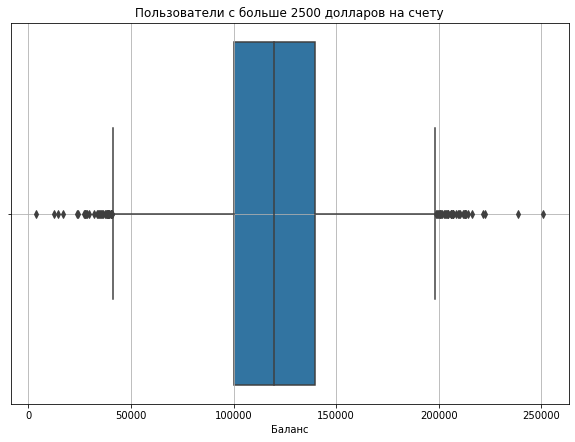

In [9]:
grouped_cases = churn_data[churn_data['Balance'] > 2500.00]
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=grouped_cases,
    x='Balance',
    orient='h',
    width=0.9
)
boxplot.set_title('Пользователи с больше 2500 долларов на счету');
boxplot.set_xlabel('Баланс');
boxplot.grid()


***Вывод***

Основная доля пользователей имеет на счету примерно 100-150 тыс. долларов на счету.

**9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.**

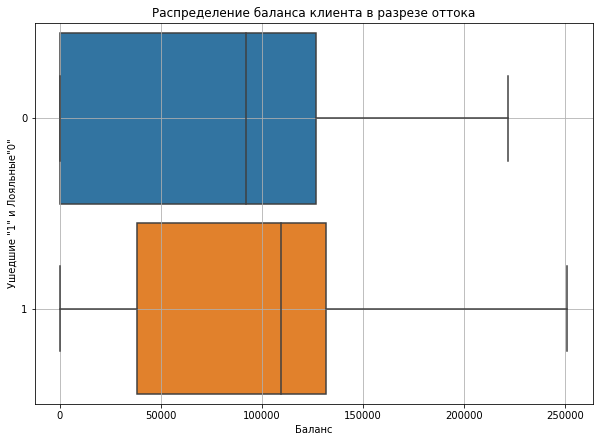

In [10]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Balance',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение баланса клиента в разрезе оттока');
boxplot.set_xlabel('Баланс');
boxplot.set_ylabel('Ушедшие "1" и Лояльные"0"')
boxplot.grid()

***Вывод***

Если смотреть на лояльных клиентов, то можно предположить, что эти клиенты верны банку т.е. их все устраивает даже несмотря на нулевой баланс или они просто забыли и пользуются банком.

Если смотреть на ушедших клиентов, то можно увидеть, что они зарабатывает чуть больше, медиана составляет более 100 тыс. долларов.
Можно сказать, что для ушедших клиентов это средний и высший класс общества и возможно причина ухода является большая коммиссия банка, может быть не так разнообразен дополнительные услуги банка для клиентов.


**9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?**

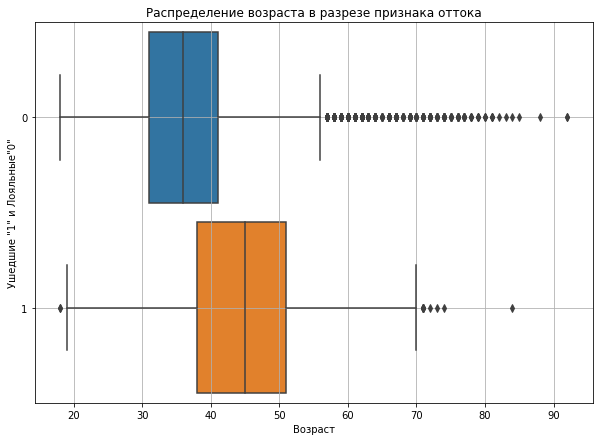

In [11]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Age',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение возраста в разрезе признака оттока');
boxplot.set_xlabel('Возраст');
boxplot.set_ylabel('Ушедшие "1" и Лояльные"0"')
boxplot.grid()

***Вывод***

Согласно графику, выбросов у лояльных клиентов больше.
Банку стоит обратить внимание на клиентов с возрастом 40-50 лет. Во-первых, это клиенты которые имееют больше количество денег чем лояльные, и Во-вторых это уже состоявшейся люди и им трубется больше льгот, напримре, на ипотеку, дополнительных услуг банка. 

**9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.**

In [12]:
group_slary = churn_data.groupby(['CreditScore', 'Exited'], as_index=False)['EstimatedSalary'].median()

fig = px.scatter(
    data_frame = group_slary,
    x = 'EstimatedSalary',
    y='CreditScore',
    color='Exited',
    height=300,
    width=700,
    title='Зависимость крединого рейтинга от предполагаемой заработной платы'
)
fig.show()

***Вывод***

Можно сказать, что большинство клиентов имеет около 100к и кредитный рейти 600к

**9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.**

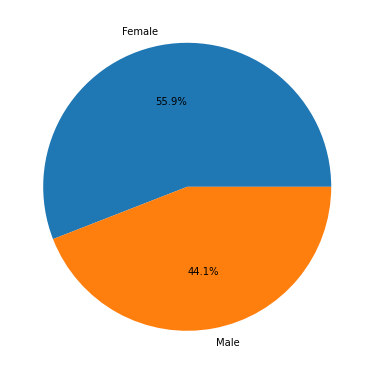

In [13]:
data_gender = churn_data.groupby(['Gender'])['Exited'].sum()

fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    data_gender,
    labels=data_gender.index,
    autopct='%.1f%%',
);

***Вывод***

Львиная доля ушедших составлют женщины 55,9% и мужчины 44,1%.

**9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.**

In [14]:
bar_data = churn_data.groupby(['NumOfProducts', 'Exited'], as_index=False).count()
fig = px.bar(
    data_frame=bar_data,
    x='NumOfProducts',
    y='RowNumber',
    color='Exited',
    barmode='group',
    height=300,
    width=700,
    title='Соотношение ушедших и лояльных клиентов в зависимости от числа услуг'
)
fig.show()

***Вывод***

Видим, что ушедшие клиенты преобритают услуги больше, чем лояльные.


**9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?**

In [15]:
Active_cliens = churn_data.groupby(['IsActiveMember'])['Exited'].sum() # групируем нужные нам столбцы
# строим график
fig = px.bar(
    data_frame=Active_cliens,
    x=Active_cliens.index,
    y='Exited',
    height=500, #высота
    width=700, #ширина
    title='Взаимосвязь статуса активности и оттока клиентов'
)
fig.show()

***Вывод***

Для того чтобы уменьшить отток клиентов среди неактивных, можно им предложить бесплатные услуги банка или снизить стоимость услуг. Например, среди неактивных более полугода пердлагать страховки со скидкой 10-15%, потребительские кредиты и т.п.

**9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.**

In [16]:
churn_lived = churn_data.groupby(['Geography'])['Exited'].mean()
#строим график
fig = px.choropleth(
    data_frame=churn_lived, #DataFrame
    locations=churn_lived.index, #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="Exited", #от чего зависит цвет
    range_color=[0, 1], #диапазон цвета
    title='Доля ушедших клиентов по странам', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)
#отображаем график
fig.show()

***Вывод***

Как мы видим, львиная доля ушедших клиентов из Германии, потом Испании и Франции

**9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.**
Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

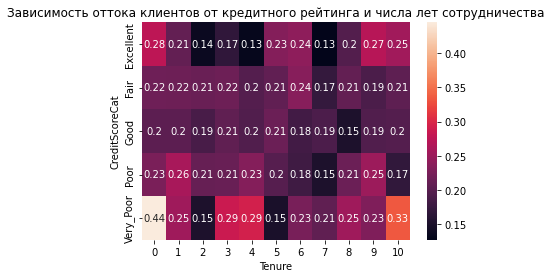

In [17]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)
pivot = churn_data.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure'
)
fig = plt.figure()
ax = sns.heatmap(data=pivot, annot=True);
ax.set_title('Зависимость оттока клиентов от кредитного рейтинга и числа лет сотрудничества');